Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.

In [2]:
import pandas as pd
import numpy as np

In [86]:
df = pd.read_csv('fatal-police-shootings-data.csv')

In [88]:
df.head(30)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

In [7]:
new_df = df[['name','race','signs_of_mental_illness']]
new_df

,name,race,signs_of_mental_illness
0,Tim Elliot,A,True
1,Lewis Lee Lembke,W,False
2,John Paul Quintero,H,False
3,Matthew Hoffman,W,True
4,Michael Rodriguez,H,False
...,...,...,...
5411,William Slyter,W,False
5412,TK TK,NaN,False
5413,Nicholas Hirsh,W,False
5414,TK TK,NaN,False


In [8]:
df_pivot = df.pivot_table(values='id',index='race',columns='signs_of_mental_illness',aggfunc=np.count_nonzero)
df_pivot

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [10]:
def rate(row):
    return row[True] / (row[True] + row[False])

# Dodanie nowej kolumny 'Rate_True' do df_pivot
df_pivot['Rate_True%'] = df_pivot.apply(rate, axis=1)
df_pivot['Rate_True%'] = df_pivot['Rate_True%'] * 100
df_pivot['Rate_True%'] = df_pivot['Rate_True%'].round(2).astype(str) + '%'

df_pivot = df_pivot.sort_values(by='Rate_True%', ascending=False)
df_pivot


signs_of_mental_illness,False,True,Rate_True%
race,,,
W,1763,713,28.8%
A,69,24,25.81%
O,37,11,22.92%
N,64,14,17.95%
H,745,157,17.41%
B,1114,184,14.18%


In [11]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [12]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

In [90]:
df['date'].value_counts()

date
2018-06-29    9
2018-04-01    9
2018-02-01    9
2020-05-26    9
2018-01-06    9
             ..
2016-07-15    1
2016-07-18    1
2019-08-07    1
2019-08-06    1
2018-06-15    1
Name: count, Length: 1844, dtype: int64

In [92]:
df['date']=pd.to_datetime(df['date'])
df['weekday']=df['date'].dt.day_name()

df_day_counts = df['weekday'].value_counts()
df_day_counts

weekday
Wednesday    829
Tuesday      816
Thursday     810
Friday       761
Sunday       753
Monday       726
Saturday     721
Name: count, dtype: int64

C:\Users\szewc\AppData\Local\Temp\ipykernel_63220\1102755744.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Weekdays')


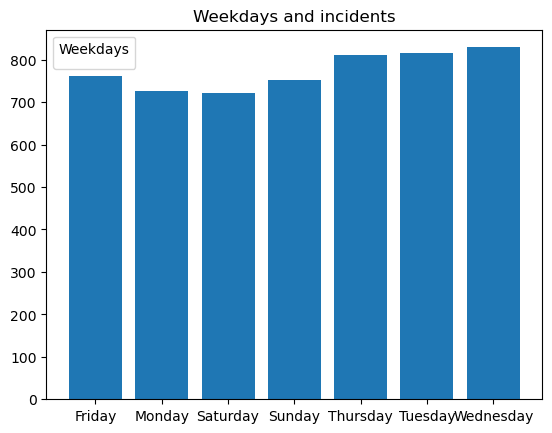

In [94]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()



count_per_weekday = df['weekday'].value_counts().sort_index() #aggregates the number of incidents per weekday and sorts them by the weekday name.


ax.bar(count_per_weekday.index,count_per_weekday.values)
#ax.bar(): Takes  as the  argument (array of weekdays) and  as the  argument (array of incident counts).


ax.set_title('Weekdays and incidents')
ax.legend(title='Weekdays')

plt.show()

Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [140]:
populations = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)

In [142]:
df_population = populations[0]
df_population.head()

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]"
0,1,1,California,39538223,37253956,6.1%,+2284267,52,732189,760350,11.80%
1,2,2,Texas,30145505,25145561,15.9%,+3999944,38,728638,766987,8.70%
2,3,4,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%
3,4,3,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%
4,5,6,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%


In [176]:
df_abbreviations = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations', header=0)

In [178]:
df_states = df_abbreviations[1]
df_states.head()



,Name,Status of region,ISO,ANSI,ANSI.1,USPS,USCG,GPO,AP,Other abbreviations
0,Name,Status of region,NaN,NaN,NaN,NaN,NaN,GPO,AP,Other abbreviations
1,United States of America,Federal state,US USA 840,US,0.0,NaN,NaN,U.S.,U.S.,U.S.A.
2,Alabama,State,US-AL,AL,1.0,AL,AL,Ala.,Ala.,NaN
3,Alaska,State,US-AK,AK,2.0,AK,AK,Alaska,Alaska,Ak.[2]
4,Arizona,State,US-AZ,AZ,4.0,AZ,AZ,Ariz.,Ariz.,NaN


In [180]:
df_population_USA = df_population[['State', 'Census population, April 1, 2020 [1][2]']]
df_population_USA

,State,"Census population, April 1, 2020 [1][2]"
0,California,39538223
1,Texas,30145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700
5,Illinois,12812508
6,Ohio,11799448
7,Georgia,10711908
8,North Carolina,10439388
9,Michigan,10077331


In [182]:
df_population_USA = df_population_USA.rename(columns={'State' : 'Name', 'Census population, April 1, 2020 [1][2]': 'Population'})
df_population_USA.head()

,Name,Population
0,California,39538223
1,Texas,30145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700


In [184]:
#tabela dla oznaczenia stanów
df_states_USA = df_states[['USPS', 'Name']]
df_states_USA = df_states_USA.rename(columns={'USPS': 'state'})
df_states_USA.head()

,state,Name
0,NaN,Name
1,NaN,United States of America
2,AL,Alabama
3,AK,Alaska
4,AZ,Arizona


In [186]:
#merge dwóch tabel
df_merged = pd.merge(df_states_USA, df_population_USA, on='Name', how='inner')
df_merged.head()

,state,Name,Population
0,AL,Alabama,5024279
1,AK,Alaska,733391
2,AZ,Arizona,7151502
3,AR,Arkansas,3011524
4,CA,California,39538223


In [192]:
#zliczenie wystąpień per state z głównej df
df_total_per_state = df['state'].value_counts()
df_total_per_state.head()

state
CA    799
TX    481
FL    350
AZ    254
CO    195
Name: count, dtype: int64

In [198]:
df_merged_total = pd.merge(df_total_per_state, df_merged, on='state', how='left') 
df_merged_total.head()

,state,count,Name,Population
0,CA,799,California,39538223
1,TX,481,Texas,30145505
2,FL,350,Florida,21538187
3,AZ,254,Arizona,7151502
4,CO,195,Colorado,5773714


In [200]:
#obliczenie wystąpień per 1000 mieszkańców dla każdego stanu
df_merged_total['per_1000'] = (1000 * df_merged_total['count']) / df_merged_total['Population']
# Zamiana wartości w 'per_1000' na proce
df_sorted = df_merged_total.sort_values(by='per_1000', ascending=False)
print(df_sorted[['state', 'Name', 'per_1000']].to_string(index=False))

state                 Name  per_1000
   AK               Alaska  0.053178
   NM           New Mexico  0.050059
   OK             Oklahoma  0.041421
   AZ              Arizona  0.035517
   CO             Colorado  0.033774
   NV               Nevada  0.030922
   WV        West Virginia  0.030105
   MT              Montana  0.028592
   AR             Arkansas  0.027561
   WY              Wyoming  0.024270
   LA            Louisiana  0.023402
   MO             Missouri  0.022909
   ID                Idaho  0.022837
   MS          Mississippi  0.021950
   KY             Kentucky  0.021084
   OR               Oregon  0.020768
   AL              Alabama  0.020699
   HI               Hawaii  0.020615
   CA           California  0.020208
   TN            Tennessee  0.020113
   WA           Washington  0.019727
   SD         South Dakota  0.019173
   DC District of Columbia  0.018853
   UT                 Utah  0.018340
   SC       South Carolina  0.017193
   KS               Kansas  0.017019
 

In [39]:
df_merged_all['state'].value_counts().sort_index()

state
AK     39
AL    104
AR     83
AS      1
AZ    254
CA    799
CO    195
CT     21
DC     13
DE     13
FL    350
GA    182
GU      1
HI     30
IA     32
ID     42
IL    104
IN     95
KS     50
KY     95
LA    109
MA     35
MD     79
ME     22
MI     78
MN     61
MO    141
MP      1
MS     65
MT     31
NC    156
ND     11
NE     24
NH     13
NJ     68
NM    106
NV     96
NY    101
OH    155
OK    164
OR     88
PA    108
PR      1
RI      4
SC     88
SD     17
TN    139
TX    481
UT     60
VA     95
VI      1
VT      9
WA    152
WI     91
WV     54
WY     14
Name: count, dtype: int64